In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb 


# lectura de datos

In [2]:
df =  pd.read_csv('breast_cancer.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Pre procesamiento de datos

## descripcion de los datos 


In [3]:
print(df.describe())
print(df.shape)



       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.830000e+02       683.000000               683.000000   
mean         1.076720e+06         4.442167                 3.150805   
std          6.206440e+05         2.820761                 3.065145   
min          6.337500e+04         1.000000                 1.000000   
25%          8.776170e+05         2.000000                 1.000000   
50%          1.171795e+06         4.000000                 1.000000   
75%          1.238705e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                683.000000         683.000000   
mean                   3.215227           2.830161   
std                    2.988581           2.864562   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000     

vemos que tenemos 683 datos en 11 columnas

In [4]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

notamos que todas las variables son numericas y que la variable sample code number no sera de utilidad

In [5]:
print(df.isna().sum())

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


vemos que no tenemos ningun valor faltante porque no necesitamos imputar valores

In [6]:
df.duplicated().sum()

np.int64(8)

vemos que tenemos 8 valores duplicados por los que los eliminaremos 

In [7]:
df=df.drop_duplicates()
df.shape

(675, 11)

vemos que disminuyo la cantidad de datos

# Particion de los datos 

## Separacion de variables

In [8]:
# variables Xs
X = df.iloc[:,1:-1] # -1 para quitar la variable Y de dataset y 1 para excluir la variable sample code number 
Y = df.iloc[:,-1]

In [9]:
# Ahora convertiremos los valores a matrices
X = X.values
Y = Y.values

# Particion de los datos para los datos de entrenamiento y los datos de prueba

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Modelos

## Regresion Logistica

In [11]:
from sklearn.linear_model import LogisticRegression
gl = LogisticRegression(random_state = 0)
gl.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Prediccion 

In [12]:
y_predgl = gl.predict(X_test)

### Matriz de Confusion

In [20]:
from sklearn.metrics import confusion_matrix
cmgl = confusion_matrix(y_test, y_predgl)
print(cmgl)

[[132   5]
 [  2  64]]


### Acurracy Balanceado

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

# balanced_accuracy ya está disponible directamente como string en scoring
balanced_accuracies = cross_val_score(estimator=gl, X=X_train, y=y_train, cv=10, scoring='balanced_accuracy')

print("Balanced Accuracy: {:.2f} %".format(balanced_accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(balanced_accuracies.std() * 100))

Balanced Accuracy: 96.64 %
Standard Deviation: 2.09 %


## SVM lineal

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainsvm = sc.fit_transform(X_train)
X_testdvm = sc.transform(X_test)

In [14]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_trainsvm, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Prediccion

In [15]:
y_predsvm = svm.predict(X_testdvm)
print(np.concatenate((y_predsvm.reshape(len(y_predsvm),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]

### Matriz de confusion

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmsvm = confusion_matrix(y_test, y_predsvm)
print(cmsvm)


[[132   5]
 [  2  64]]


### Accuracy Balanceado

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

# balanced_accuracy ya está disponible directamente como string en scoring
balanced_accuraciessvm = cross_val_score(estimator=svm, X=X_trainsvm, y=y_train, cv=10, scoring='balanced_accuracy')

print("Balanced Accuracy: {:.2f} %".format(balanced_accuraciessvm.mean() * 100))
print("Standard Deviation: {:.2f} %".format(balanced_accuraciessvm.std() * 100))

Balanced Accuracy: 97.10 %
Standard Deviation: 2.27 %


## Random Forest

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainrf = sc.fit_transform(X_train)
X_testrf = sc.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_trainrf, y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Prediccion

In [19]:
y_predrf = rf.predict(X_testrf)
print(np.concatenate((y_predrf.reshape(len(y_predrf),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]

### Matriz de Confusion


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmrf = confusion_matrix(y_test, y_predrf)
print(cmrf)

[[131   6]
 [  6  60]]


### Accuracy Balanceado

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

# balanced_accuracy ya está disponible directamente como string en scoring
balanced_accuraciesrf = cross_val_score(estimator=rf, X=X_trainrf, y=y_train, cv=10, scoring='balanced_accuracy')

print("Balanced Accuracy: {:.2f} %".format(balanced_accuraciesrf.mean() * 100))
print("Standard Deviation: {:.2f} %".format(balanced_accuraciesrf.std() * 100))

Balanced Accuracy: 95.17 %
Standard Deviation: 3.28 %


# Grafico Comparativo

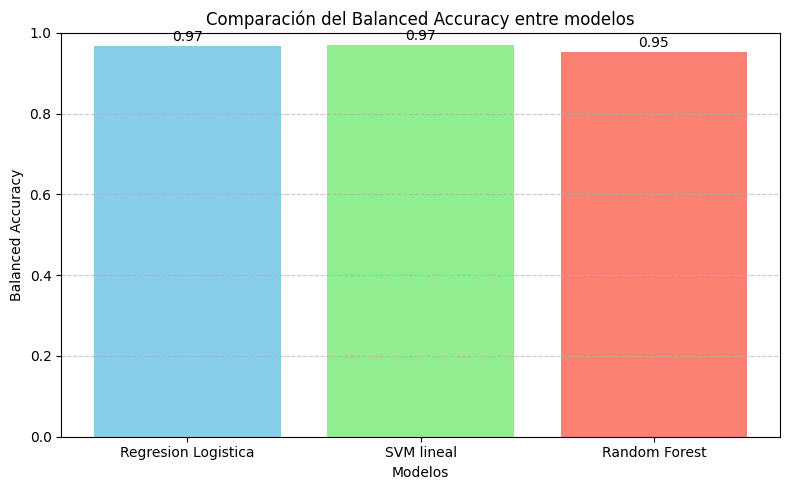

In [27]:

mean_balanced_accuracies = [
    balanced_accuracies.mean(),
    balanced_accuraciessvm.mean(),
    balanced_accuraciesrf.mean()
]

model_names = ['Regresion Logistica', 'SVM lineal', 'Random Forest']


plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, mean_balanced_accuracies, color=['skyblue', 'lightgreen', 'salmon'])

# Mostrar valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom')

plt.ylim(0, 1)
plt.title('Comparación del Balanced Accuracy entre modelos')
plt.ylabel('Balanced Accuracy')
plt.xlabel('Modelos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La coincidencia en el rendimiento entre Regresión Logística y SVM lineal se debe a que ambos modelos comparten una estructura lineal de decisión, y el dataset utilizado presenta una separación de clases que puede ser capturada adecuadamente por hiperplanos lineales. Esto, sumado a la validación cruzada, ha producido valores casi idénticos en balanced accuracy, confirmando que en este problema, los modelos simples e interpretables son altamente eficaces.